In [5]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [82]:
#read dataset
df=pd.read_csv("Anime.csv")
#show dataset dimention
df.shape

(4925, 20)

In [84]:
# Describe dataset 
df.describe()

,anime_id,my_score,user_id,score,scored_by,rank,popularity,Members,Favorites,Completed,On-Hold,Dropped
count,4925.000000,4925.000000,4.925000e+03,4925.000000,4925.000000,4925.000000,4925.000000,4.925000e+03,4925.000000,4925.000000,4925.000000,4925.000000
mean,11141.442437,4.587208,1.532683e+06,7.519182,101633.151269,2131.989848,1412.111269,9.732457e+04,734.720406,361994.711269,7358.420914,1348.993909
std,11166.987587,3.856320,1.876781e+06,0.734288,139514.450243,2031.703465,1606.743783,1.313324e+05,5882.872148,280727.135717,19631.240449,5965.380662
min,1.000000,0.000000,1.000000e+00,2.330000,200.000000,1.000000,1.000000,2.110000e+02,0.000000,1273.000000,10.000000,0.000000
25%,1562.000000,0.000000,1.416140e+05,7.110000,15260.000000,532.000000,291.000000,4.950000e+03,2.000000,150183.000000,712.000000,81.000000
50%,6956.000000,6.000000,4.137900e+05,7.550000,49113.000000,1485.000000,841.000000,1.278780e+05,10.000000,208333.000000,1935.000000,155.000000
75%,18393.000000,8.000000,2.863301e+06,8.020000,125060.000000,3191.000000,1940.000000,1.482590e+05,67.000000,718161.000000,1935.000000,487.000000
max,37537.000000,10.000000,7.122186e+06,9.250000,1000000.000000,9517.000000,9881.000000,2.589552e+06,183914.000000,718161.000000,187919.000000,174710.000000


In [132]:
# One-hot encoding 'source' column
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Perform one-hot encoding on the 'origin' column
gender_encoded = encoder.fit_transform(df[['gender']]).toarray()

# Create a DataFrame with the encoded values
df_encoded = pd.concat([df, pd.DataFrame(gender_encoded, columns=encoder.get_feature_names(['gender']))], axis=1)

df_encoded

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,...,Duration,Rating,Members,Favorites,Completed,On-Hold,Dropped,gender_Female,gender_Male,gender_Non-Binary
0,karthiga,21,9,2255153,Female,One Piece,TV,Manga,8.54,423868.0,...,24 min. per ep.,R - 17+ (violence & profanity),1251960,61971,718161,71513,26678,1.0,0.0,0.0
1,RedvelvetDaisuki,918,0,1897606,Female,Gintama,TV,Manga,9.01,141830.0,...,1 hr. 55 min.,R - 17+ (violence & profanity),273145,1174,208333,1935,770,1.0,0.0,0.0
2,RedvelvetDaisuki,9479,3,1897606,Female,Coppelion,TV,Manga,6.54,37299.0,...,24 min. per ep.,PG-13 - Teens 13 or older,558913,12944,718161,71513,13925,1.0,0.0,0.0
3,RedvelvetDaisuki,22135,8,1897606,Female,Ping Pong The Animation,TV,Manga,8.65,72887.0,...,25 min. per ep.,PG-13 - Teens 13 or older,94683,587,718161,71513,5378,1.0,0.0,0.0
4,Damonashu,1829,6,37326,Male,Gedo Senki,Movie,Novel,7.13,44087.0,...,23 min. per ep.,PG - Children,13224,18,718161,766,1108,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Sam_J,32696,6,26952,Male,Fukigen na Mononokean,TV,Web manga,7.45,26464.0,...,15 min. per ep.,PG-13 - Teens 13 or older,148259,8,150183,112,100,0.0,1.0,0.0
4921,nikekid9387,343,7,68295,Male,Tsukuyomi: Moon Phase,TV,Manga,7.10,21039.0,...,15 min.,PG-13 - Teens 13 or older,148259,12,150183,1935,104,0.0,1.0,0.0
4922,Retridemption,885,0,531285,Female,Tenshi no Tamago,OVA,Original,7.63,20757.0,...,24 min. per ep.,PG-13 - Teens 13 or older,490554,8762,718161,12737,16529,1.0,0.0,0.0
4923,Retridemption,2369,7,531285,Female,Rental Magica,TV,Light novel,7.14,15714.0,...,15 min. per ep.,PG - Children,382,0,718161,296,51,1.0,0.0,0.0


In [133]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded[['score', 'scored_by', 'rank', 'popularity','Favorites','Dropped','On-Hold','anime_id','user_id','my_score']], df_encoded[('Completed')], test_size=0.2, random_state=36)



In [134]:
# Print X_train, X_test, y_train, y_test
print("X_train:\n", X_train.to_string(), "\nX_test:\n", X_test.to_string(), "\ny_train:\n", y_train.to_string(), "\ny_test:\n", y_test.to_string())

X_train:
       score  scored_by  rank  popularity  Favorites  Dropped  On-Hold  anime_id  user_id  my_score
3913   7.57    44550.0  1438         973          1       63     1935       166    70228         0
3757   8.27   165471.0   261         264          5     3782      145      1519   142288         0
3784   6.58     2146.0  5299        5059       1507     8158    11901      9924   235729         0
4862   7.24   100916.0  2656         425          0       72     1935       189   122314         8
258    7.83   142516.0   835         220         31     1017      712      6213   288152         0
2569   7.75    33876.0   987        1124         79      403     1777       123  5940772         0
1338   6.56     5954.0  5357        3451        143      232     1935      2356  1486055         0
1311   8.04    45045.0   509         862         24      109     1935      1594  1709189         0
235    7.91     5527.0   679        3729      15543     9660     6454       254  1039513         0


In [135]:
# Feature scaling on 'price' and 'quantity' columns
scaler = StandardScaler()
X_train[['score', 'scored_by', 'rank', 'popularity','Favorites','Dropped','On-Hold','anime_id','user_id','my_score']] = scaler.fit_transform(X_train[['score', 'scored_by', 'rank', 'popularity','Favorites','Dropped','On-Hold','anime_id','user_id','my_score']])
# Scaling the test set based on the statistical parameters of the training set (optional)
# X_test[['score', 'Completed']] = scaler.transform(X_test[['score', 'Completed']])



In [136]:
# Applying SMOTE to handle imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30, k_neighbors=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [137]:
# Feature selection with RFE using Logistic Regression
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train_res, y_train_res)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


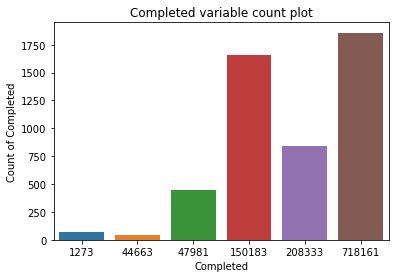

In [138]:
#plot for target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df["Completed"])
plt.xlabel("Completed")
plt.ylabel("Count of Completed")
plt.title("Completed variable count plot")
plt.show()


In [139]:
# Get the feature ranking
print("Feature ranking: ", rfe.ranking_)


Feature ranking:  [4 9 3 5 2 1 1 6 7 8]


In [140]:
# Get the mask of selected features
selected_features = rfe.support_
selected_features

array([False, False, False, False, False,  True,  True, False, False,
       False])

In [141]:
# Print the names of selected features
print("Selected features: ", X_train.columns[selected_features])


Selected features:  Index(['Dropped', 'On-Hold'], dtype='object')


In [142]:
# Keep only the selected features
X_train_res = X_train_res.loc[:, X_train.columns[selected_features]]
X_test = X_test.loc[:, X_train.columns[selected_features]]

In [143]:
# Fitting KNN with selected features
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [144]:
# Making predictions
y_pred_KNN = KNN.predict(X_test)


In [145]:
# Printing actuals and predictions
print('Actuals:\t\t', list(y_test))
print('Predictions with KNN model:\t', list(y_pred_KNN))


Actuals:		 [718161, 150183, 718161, 718161, 718161, 47981, 150183, 150183, 150183, 718161, 718161, 718161, 208333, 718161, 718161, 1273, 718161, 150183, 150183, 150183, 718161, 718161, 718161, 150183, 208333, 150183, 150183, 47981, 44663, 150183, 150183, 47981, 718161, 47981, 150183, 718161, 718161, 718161, 718161, 150183, 718161, 150183, 718161, 208333, 718161, 208333, 150183, 718161, 150183, 718161, 208333, 208333, 718161, 150183, 208333, 47981, 150183, 208333, 150183, 150183, 718161, 47981, 150183, 208333, 150183, 718161, 150183, 150183, 718161, 208333, 150183, 150183, 718161, 150183, 150183, 208333, 150183, 718161, 208333, 208333, 208333, 150183, 47981, 718161, 718161, 47981, 718161, 718161, 150183, 718161, 718161, 150183, 47981, 150183, 718161, 47981, 150183, 150183, 208333, 150183, 208333, 47981, 208333, 208333, 718161, 718161, 150183, 718161, 150183, 718161, 208333, 47981, 208333, 718161, 150183, 718161, 718161, 150183, 208333, 718161, 47981, 718161, 1273, 208333, 718161, 718161

In [146]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_KNN)  
print("Confusion matrix: \n", conf_matrix)


Confusion matrix: 
 [[  0   0   0   0   0  18]
 [  0   0   0   0   0  10]
 [  0   0   0   0   0  87]
 [  0   0   0   0   0 356]
 [  0   0   0   0   0 164]
 [  0   0   0   0   0 350]]


In [147]:
# Extracting True Positives with 'Poppy' being the positive class
true_positives = conf_matrix[0, 0]
print("True Positives: ", true_positives)

True Positives:  0


In [152]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded[['score', 'scored_by', 'rank', 'popularity','Favorites','Dropped','On-Hold','anime_id','user_id','my_score']], df_encoded[('Completed')], test_size=0.2, random_state=36)



In [153]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [154]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",
                          max_depth=8,
                          min_samples_split=10,
                          random_state=5)

In [155]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [156]:
clf.feature_importances_

array([0.01591567, 0.01353466, 0.01581358, 0.01451833, 0.08887733,
       0.27927209, 0.5264252 , 0.01876038, 0.02112089, 0.00576188])

In [157]:
# Calculating Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0,   0,   5,   6,   1,   6],
       [  0,   3,   2,   1,   4,   0],
       [  3,   2,  20,  25,  31,   6],
       [  5,   2,  53, 216,  63,  17],
       [  3,   2,  31,  44,  84,   0],
       [  4,   0,   6,  20,   0, 320]], dtype=int64)

In [158]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6527918781725889

In [159]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=10)

array([0.71827411, 0.69035533, 0.65989848, 0.7106599 , 0.7106599 ,
       0.69035533, 0.7284264 , 0.69035533, 0.73350254, 0.69543147])

In [165]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        1273       0.00      0.00      0.00         0
       44663       0.00      0.00      0.00         0
       47981       0.00      0.00      0.00         0
      150183       0.62      0.46      0.53       486
      208333       0.00      0.00      0.00         0
      718161       0.59      0.41      0.48       499

    accuracy                           0.43       985
   macro avg       0.20      0.14      0.17       985
weighted avg       0.60      0.43      0.50       985



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

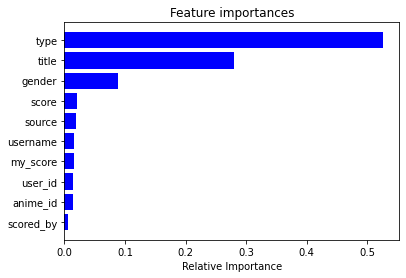

In [166]:
#Relative Importance Plot
features=df.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
plt.title ("Feature importances")
plt.barh (range(len(indices)), importances[indices], color='b', align='center')
plt.yticks (range(len(indices)), [features[i] for i in indices])
plt.xlabel ("Relative Importance")
plt.show

In [167]:

# Splitting the dataset into training and testing set (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded[['score', 'scored_by', 'rank', 'popularity','Favorites','Dropped','On-Hold','anime_id','user_id','my_score']], df_encoded[('Completed')], test_size=0.2, random_state=36)

In [168]:
# Fitting the Decision Tree Regression model to the data
model.fit(X_train, y_train) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)


In [170]:

# RMSE (Root Mean Square Error)
import numpy as np # for array operations
from sklearn.metrics import mean_squared_error # for calculating the cost function
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:",rmse)



RMSE: 384796.869
